In [14]:
import pandas as pd
import seaborn as sns
import numpy as np 
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.stats as ss

In [3]:
df_sea=pd.read_csv("epa-sea-level.csv",index_col="Year")
df_sea.head()

,CSIRO Adjusted Sea Level,Lower Error Bound,Upper Error Bound,NOAA Adjusted Sea Level
Year,,,,
1880,0.000000,-0.952756,0.952756,NaN
1881,0.220472,-0.732283,1.173228,NaN
1882,-0.440945,-1.346457,0.464567,NaN
1883,-0.232283,-1.129921,0.665354,NaN
1884,0.590551,-0.283465,1.464567,NaN


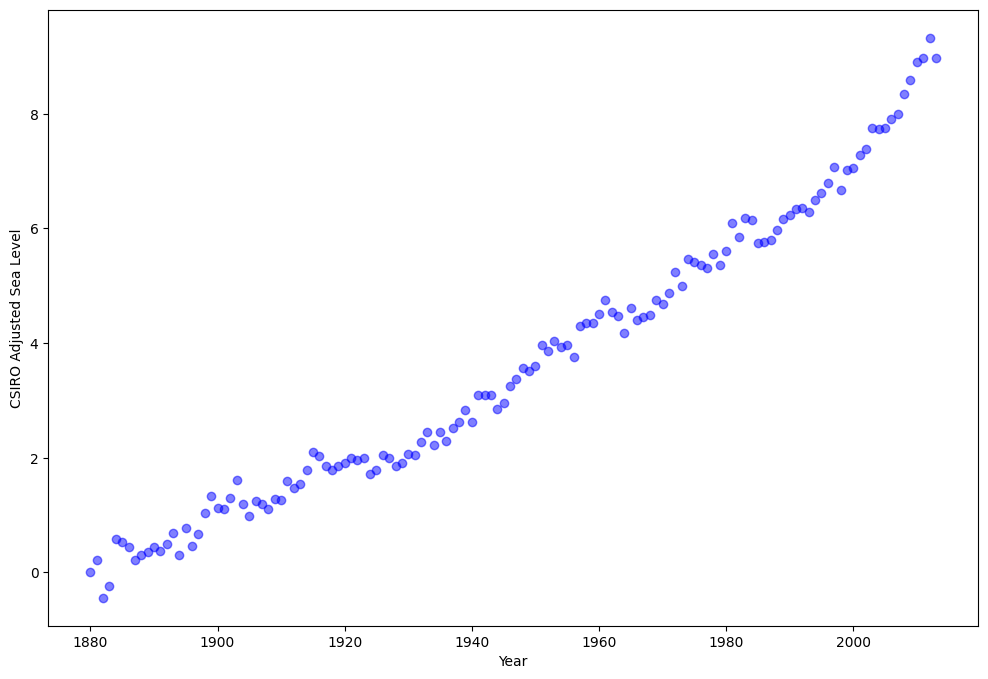

In [25]:
x = df_sea.index.values 
y = df_sea["CSIRO Adjusted Sea Level"].values


plt.figure(figsize=(12, 8))
plt.scatter(x, y, label="Data", color="blue", alpha=0.5)
plt.xlabel("Year")
plt.ylabel("CSIRO Adjusted Sea Level")


plt.show()


In [63]:
Values=ss.linregress(df['Year'],df_sea['CSIRO Adjusted Sea Level'])
slope=Values[0]
y_intercept=Values[1]

In [64]:
def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

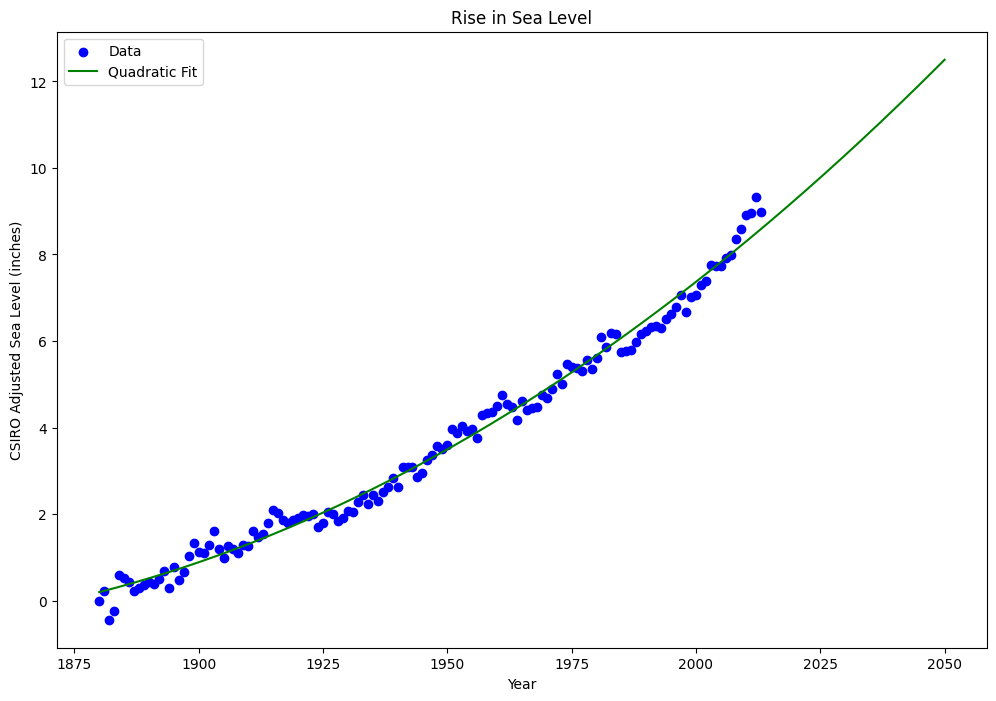

In [71]:
popt_quad, pcov_quad = curve_fit(quadratic_func, df['Year'], df['CSIRO Adjusted Sea Level'])
a_quad, b_quad, c_quad = popt_quad

plt.figure(figsize=(12, 8))
plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Data')

years_fit = np.linspace(df['Year'].min(), 2050, 500)
sea_levels_fit_quad = quadratic_func(years_fit, a_quad, b_quad, c_quad)
plt.plot(years_fit, sea_levels_fit_quad, color='green', linestyle='-', label='Quadratic Fit')

plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (inches)')
plt.title('Rise in Sea Level')
plt.legend()

plt.show()


Predicted sea level in 2050 (Quadratic): 18.77 inches


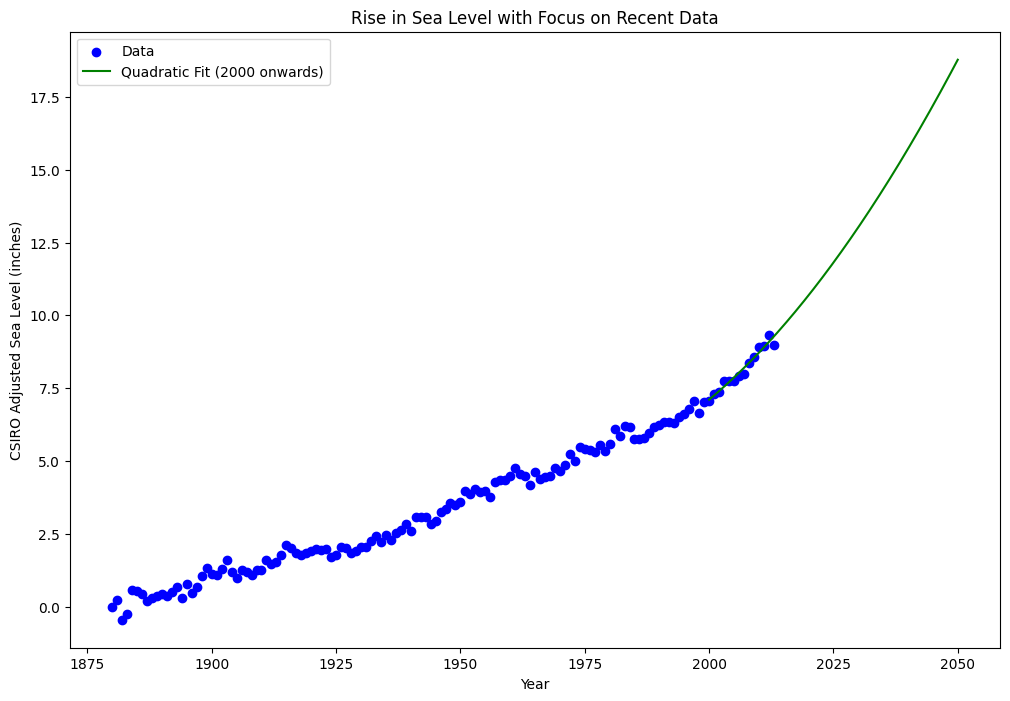

In [70]:
df_recent = df[df['Year'] >= 2000]


popt_quad_recent, pcov_quad_recent = curve_fit(quadratic_func, df_recent['Year'], df_recent['CSIRO Adjusted Sea Level'])
a_quad_recent, b_quad_recent, c_quad_recent = popt_quad_recent

plt.figure(figsize=(12, 8))

plt.scatter(df['Year'], df['CSIRO Adjusted Sea Level'], color='blue', label='Data')

years_fit_recent = np.linspace(2000, 2050, 500)  
sea_levels_fit_quad_recent = quadratic_func(years_fit_recent, a_quad_recent, b_quad_recent, c_quad_recent)

plt.plot(years_fit_recent, sea_levels_fit_quad_recent, color='green', linestyle='-', label='Quadratic Fit (2000 onwards)')
sea_level_2050_quad = quadratic_func(2050, a_quad_recent, b_quad_recent, c_quad_recent)

# Print the prediction
print(f"Predicted sea level in 2050 (Quadratic): {sea_level_2050_quad:.2f} inches")

plt.xlabel('Year')
plt.ylabel('CSIRO Adjusted Sea Level (inches)')
plt.title('Rise in Sea Level with Focus on Recent Data')
plt.legend()

plt.show()
